In [7]:
#load modules and libraries needed for the problem
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [9]:
#define plotting parameters for the whole notebook
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [10]:
#set likely values for parameters used in the problem
g = 9.81 #gravity
vt = 30.0 #trim velocity
CD = 1.0 / 40 #drag coefficient
CL = 1.0 #lift coefficient

#set the inital conditions for the problem
v0 = vt #start at trim velocity
theta0 = 0.0 #trajectory angle 0.0 is trim
x0 = 0.0 #horizontal position
y0 = 1000.0 #altitude of aircraft

In [11]:
#function defition for the right hand side of the $f(u)$ equation

def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - (CD / CL) * (g / vt**2) * v**2,
                       -g * (math.cos(theta) / v) +(g / vt**2) * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

In [12]:
#implement Euler's method in its own function
#note: the input *args is optional so this function can take 
#in a function with any number of input

def euler_step(u,f,dt,*args):
    u_new = u +dt * f(u, *args)
    return u_new

In [38]:
T = 100.0 #length of time interval
dt = 0.1 #size of the time steps
N = int(T/dt) + 1 #number of time steps

u = numpy.empty((N,4)) #array that will store the solution at each time step
u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions

for n in range(N-1): #integrate over time with euler
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt) 
    #example of using the euler_step function with more inputs

In [19]:
#find the location of the aircraft at each time step
x = u[:, 2]
y = u[:, 3]

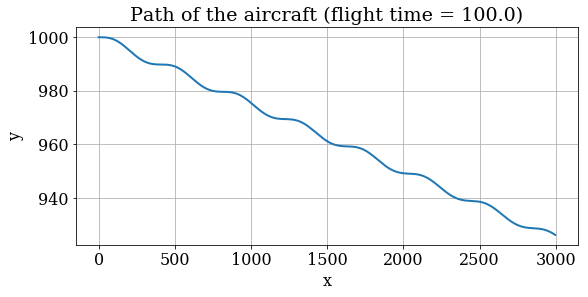

In [20]:
#plot of the aircraft's position over time
pyplot.figure(figsize=(9.0,4.0))
pyplot.title('Path of the aircraft (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

In [21]:
#to study the convergence of the solution for different timesteps
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

u_values = [] #empty list to hold the solutions

for dt in dt_values:
    N = int(T / dt) +1 #number of time-steps
    u = numpy.empty((N,4)) #array to store solutions
    u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions
    for n in range(N-1): #integration over time with euler
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u) #store the solutions

In [23]:
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff
#defition of function to find the differences for the timesteps

In [24]:
diff_values = [] #empty list to store the difference in solutions

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:,2], dt)
    diff_values.append(diff)

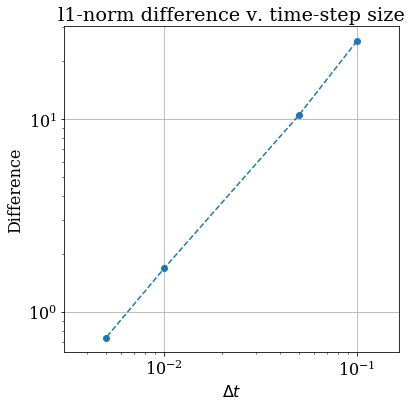

In [25]:
#plot the differences v. time steps
pyplot.figure(figsize = (6.0, 6.0))
pyplot.title('l1-norm difference v. time-step size')
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [29]:
r = 2 #refinement ratio for the time-step size
h = 0.001 #base grid size

dt_values2 = [h, r*h, r**2 *h]
u_values2 = []

for dt in dt_values2:
    N = int(T / dt) + 1 #number of time-steps
    u = numpy.empty((N,4)) #empty array to store solutions
    u[0] = numpy.array([v0, theta0, x0, y0]) #initial conditions
    
    for n in range(N-1): #time integration with euler
        u[n+1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
        
    u_values2.append(u) #store the solution
    
f2_f1 = l1_diff(u_values2[1][:,2], u_values2[0][:,2], dt_values2[1]) 
f3_f2 = l1_diff(u_values2[2][:,2], u_values2[1][:,2], dt_values2[2]) 

p = math.log(f3_f2 / f2_f1) / math.log(r) #calculate order of convergence
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.014


Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:
Assume $L/D$ of 5.0 (a value close to measurements in Feng et al. 2009)
For the trim velocity, let's take an average value of 4.9 m/s.
Find a combination of launch angle and velocity that gives the best distance.
Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
How can you check if your answer is realistic?

In [30]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [31]:
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [32]:
#parameters, defined the same way as above
g = 9.81
vt = 4.9
CD = 1.0 / 5.0
CL = 1.0

#initial conditions
v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0 = 2.0

In [33]:
def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = numpy.array([-g *math.sin(theta) - (CD / CL) * (g / vt**2) * v**2,
                       -g *math.cos(theta) / v + g / vt**2 * v,
                      v * math.cos(theta),
                      v * math.sin(theta)])
    return rhs

def euler_step(u, f, dt, *args):
    u_new = u + dt *f(u, *args)
    return u_new

def l1_diff(u_coarse, u_fine, dt):
    N_coarse = u_coarse.shape[0]
    N_fine = u_fine.shape[0]
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [35]:
def rk2_step(u, f, dt, *args):
    u_star = u+0.5*dt*f(u, *args)
    u_new = u+dt*f(u_star, *args)
    return u_new

In [36]:
T = 15.0
dt = 0.01
N = int(T/dt)+1

u_euler = numpy.empty((N,4))
u_rk2 = numpy.empty((N,4))

u_euler[0]=numpy.array([v0, theta0, x0, y0])
u_rk2[0]=numpy.array([v0, theta0, x0, y0])

for n in range(N - 1):
    u_euler[n + 1]=euler_step(u_euler[n], rhs_phugoid, dt, CD, CD, g, vt)
    u_rk2[n + 1]=rk2_step(u_rk2[n], rhs_phugoid, dt, CL, CD, g, vt)

In [37]:
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]

In [40]:
#how far will it fly before hitting the ground?

#get the index of the first negative element of y_euler
idx_negative_euler = numpy.where(y_euler < 0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N - 1
    print('[Euler] Glider has not toughted ground yet!')
else:
    idx_ground_euler = idx_negative_euler[0]

#get index of first negative element of y_rk2
idx_negative_rk2 = numpy.where(y_rk2 < 0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N-1
    print('[RK2] Glider has not touched ground yet!')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

Distance traveled: 14.516
Distance traveled: 14.516


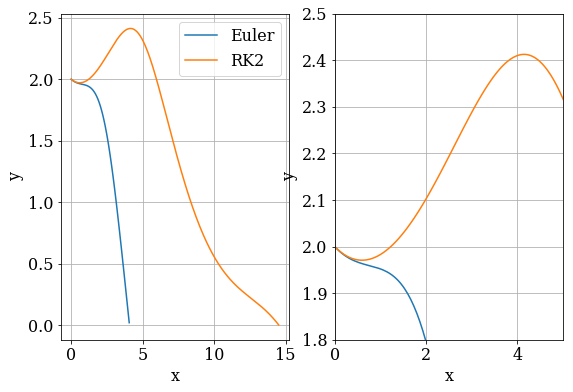

In [41]:
#do they both produce the same solution?

print('Distance traveled: {:.3f}'.format(x_rk2[idx_ground_rk2 - 1]))

# Plot the glider's path for both schemes.
pyplot.figure(figsize=(9.0, 6.0))
pyplot.subplot(121)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler],
            label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2],
            label='RK2')
pyplot.legend();
# Let's take a closer look!
pyplot.subplot(122)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_euler, y_euler, label='Euler')
pyplot.plot(x_rk2, y_rk2, label='RK2')
pyplot.xlim(0.0, 5.0)
pyplot.ylim(1.8, 2.5);

In [42]:
#grid convergence

#list of dt values to check
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

#empty list to store solutions
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1    #number of timesteps
    
    u = numpy.empty((N,4)) #initial conditions
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = rk2_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    u_values.append(u)

In [43]:
#compute differences in x-positions for ea. grid
diff_values = []

for u, dt in zip(u_values, dt_values):
    diff = l1_diff(u[:,2], u_values[-1][:,2], dt)
    diff_values.append(diff)

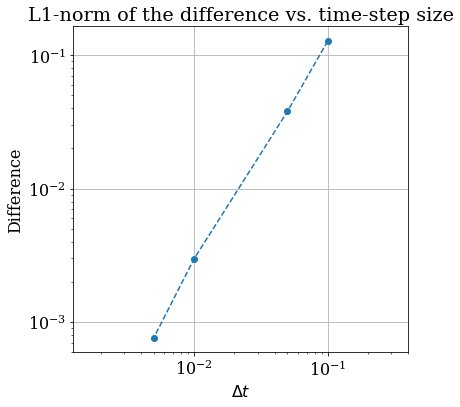

In [44]:
#plot!
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm of the difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values[:-1],
              color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

In [48]:
r = 2 #timestep refinement ratio
h = 0.001 #finest timestep size
dt_values = [h, r*h, r**2 *h]
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1 #number of timesteps
    
    u = numpy.empty((N,4)) #initial conditions
    u[0] = numpy.array([v0, theta0, x0, y0])
    
    #time integration with rk2
    for n in range(N - 1):
        u[n+1] = rk2_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    u_values.append(u) #store the solution
    
#compute order of convergence
p = (math.log(l1_diff(u_values[2], u_values[1], dt_values[2]) /
              l1_diff(u_values[1], u_values[0], dt_values[1]))/
    math.log(r))

print('Observed oder of convergence: p = {:.3f}'.format(p))

Observed oder of convergence: p = 1.980


In [52]:
#multi step methods

def leapfrog_step(u_prev, u, f, dt, *args):
    u_new = u_prev + 2.0 * dt * f(u, *args)
    return u_new

In [53]:
# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 4.9  # trim velocity (m.s)
CD = 1.0 / 5.0  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = 6.5  # start at the trim velocity
theta0 = -0.1  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 2.0  # vertical position (altitude)

T = 15.0  # length of the time interval
dt = 0.01  # time-step size
N = int(T / dt) + 1  # number of time steps

# Create arrays to store the solution at each time step.
u_leapfrog = numpy.empty((N, 4))
# Set the initial conditions.
u_leapfrog[0] = numpy.array([v0, theta0, x0, y0])
# Use the RK2 method for the first time step.
u_leapfrog[1] = rk2_step(u_leapfrog[0], rhs_phugoid, dt, CL, CD, g, vt)

In [54]:
#time integration using the leapfrog method
for n in range(1, N-1):
    u_leapfrog[n+1]= leapfrog_step(u_leapfrog[n-1], u_leapfrog[n],
                                   rhs_phugoid, dt, CL, CD, g, vt)

In [55]:
#get the position over time
x_leapfrog = u_leapfrog[:,2]
y_leapfrog = u_leapfrog[:,3]

#get the index of the first negative element of y
idx_negative_leapfrog = numpy.where(y_leapfrog < 0.0)[0]

if len(idx_negative_leapfrog) == 0:
    idx_ground_leapfrog = N - 1
    print('[leapfrog] Glider has not touched ground yet!')
else:
    idx_ground_leapfrog = idx_negative_leapfrog[0]

Distance traveled: 14.516


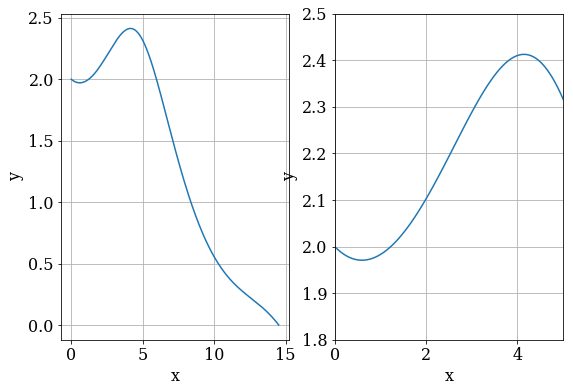

In [56]:
print('Distance traveled: {:.3f}'.format(x_leapfrog[idx_ground_leapfrog - 1]))

# Plot the glider's path for the leapfrog scheme.
pyplot.figure(figsize=(9.0, 6.0))
pyplot.subplot(121)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog],
            y_leapfrog[:idx_ground_leapfrog])
# Let's take a closer look!
pyplot.subplot(122)
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.plot(x_leapfrog, y_leapfrog)
pyplot.xlim(0.0, 5.0)
pyplot.ylim(1.8, 2.5);

In [57]:
#observed order of convergence!

r = 2  # time-step size refinement ratio
h = 0.001  # finest time-step size

dt_values = [h, r * h, r**2 * h]
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time steps
    # Set initial conditions.
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Use RK2 for the first time step.
    u[1] = rk2_step(u[0], rhs_phugoid, dt, CL, CD, g, vt)
    # Time integration using the leapfrog scheme.
    for n in range(1, N - 1):
        u[n + 1] = leapfrog_step(u[n - 1], u[n], rhs_phugoid, dt,
                                 CL, CD, g, vt)
    # Store the solution for the present time grid.
    u_values.append(u)

# Compute the observed order of convergence.
p = (math.log(l1_diff(u_values[2][:, 2], u_values[1][:, 2],
                      dt_values[2]) /
              l1_diff(u_values[1][:, 2], u_values[0][:, 2],
                      dt_values[1])) /
     math.log(r))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 2.187
